# Word Bin Counts Analysis

In [1]:
import os
import json
import random
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
dataset_dir = os.path.join('..','..','datasets','tracks_playlist_dataset')

json_file_path = os.path.join(dataset_dir,'word_count_data.json')

with open(json_file_path, 'r') as f:
    data = json.load(f)

In [3]:
list(data['global'].keys())[:10]

['low',
 'calm',
 'poison',
 'winter',
 'coffee',
 'tea',
 'wanderlust',
 'mack',
 'other',
 'out']

## Global Word Count Analysis

In [4]:
# get sorted list of words across all tracks ranked by bin count
global_word_bins = data['global']
global_sorted_words = sorted(global_word_bins.items(), key=lambda x: x[1], reverse=True)

In [5]:
global_sorted_words[:10]

[('rock', 409894),
 ('oldies', 147719),
 ('classic', 147634),
 ('party', 128832),
 ('summer', 126412),
 ('good', 119145),
 ('chill', 113242),
 ('old', 107009),
 ('classics', 79934),
 ('workout', 79276)]

In [6]:
global_sorted_words[-10:]

[('bandona', 1),
 ('kiko', 1),
 ('cumbiaa', 1),
 ('conjunto', 1),
 ('norteña', 1),
 ('ajua', 1),
 ('grupo', 1),
 ('rebelution', 1),
 ('salseando', 1),
 ('mirrey', 1)]

In [7]:
bin_counts = np.array([x[1] for x in global_sorted_words])
bin_counts[:10]

array([409894, 147719, 147634, 128832, 126412, 119145, 113242, 107009,
        79934,  79276])

In [8]:
# How many words total
len(global_sorted_words)

9275

In [9]:
int(np.max(bin_counts))

409894

In [10]:
int(np.max(bin_counts[1:]))

147719

In [11]:
# How many words with only 1 bin count
int(sum(bin_counts == 1))

296

In [12]:
thresholds = [1e2, 1e3, 1e4, 1e5, 1e6]
order_counts = np.zeros(len(thresholds))

for i,t in enumerate(thresholds):
    order_counts[i] = int(sum(bin_counts < t))

print(thresholds)
print(order_counts)

[100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
[5143. 8616. 9194. 9267. 9275.]


In [13]:
for i in range(len(bin_counts)):
    if bin_counts[i]<100:
        print(i)
        break

4132


In [14]:
for i in range(len(bin_counts)):
    if bin_counts[i]<300:
        print(i)
        break

1892


In [15]:
for i in range(len(bin_counts)):
    if bin_counts[i]<1000:
        print(i)
        break

659


In [16]:
for i in range(len(bin_counts)):
    if bin_counts[i]<10000:
        print(i)
        break

81


In [17]:
# bin_counts_rev = bin_counts[::-1]
# incs = np.zeros(len(bin_counts_rev)-1)
# for i in range(len(bin_counts_rev)-1):
#     val = bin_counts_rev[i]
#     next_val = bin_counts_rev[i+1]
#     incs[i] = next_val - val
#     if len(str(next_val)) == len(str(val)) + 1:
#         print(i)

In [18]:
# ix = 1479
# print(bin_counts_rev[ix-10:ix+1])
# print(incs[ix-10:ix+1])

In [19]:
# ix = 5344
# print(bin_counts_rev[ix-10:ix+1])
# print(incs[ix-10:ix+1])

In [20]:
# thres = 19
# for i in range(10,len(incs)):
#     prev_avg = np.mean(incs[i-10:i])

#     if prev_avg > 0:
#         v = incs[i]
#         diff = v - prev_avg
#         if diff/prev_avg > thres:
#             print(i)
#             print(v)
#             print(incs[i-10:i])
#             # print(prev_avg)
#             # print(diff)
#             print(diff/prev_avg)
#             print(bin_counts_rev[i])
#             print(bin_counts_rev[i-10:i])
#             break

In [21]:
# non_zero_incs = []
# for v in incs:
#     if v > 10:
#         non_zero_incs.append(v)
# non_zero_incs[:10]

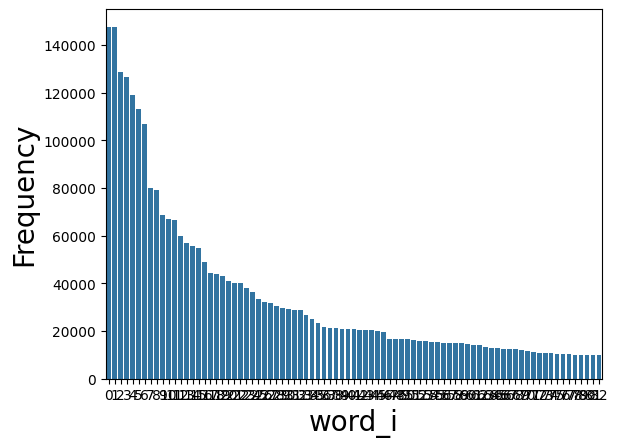

In [22]:
# sns.barplot(data=bin_counts)
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[:4739])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[1:4739])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

# sns.barplot(data=bin_counts[1:691])
# plt.xlabel("word_i",fontsize=20)
# plt.ylabel("Frequency",fontsize=20)
# plt.show()

sns.barplot(data=bin_counts[1:84])
plt.xlabel("word_i",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

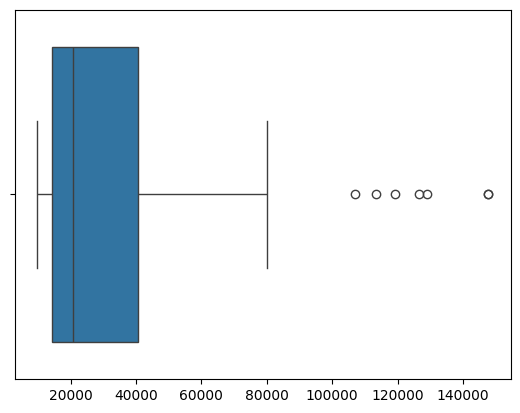

In [23]:
# sns.boxplot(x=bin_counts)
# plt.show()

# sns.boxplot(x=bin_counts[:4739])
# plt.show()

# sns.boxplot(x=bin_counts[1:4739])
# plt.show()

# sns.boxplot(x=bin_counts[1:691])
# plt.show()

sns.boxplot(x=bin_counts[1:83])
plt.show()

In [24]:
q1 = np.percentile(bin_counts[1:83], 25)
q3 = np.percentile(bin_counts[1:83], 75)
iqr = q3 - q1

lower_whisker = np.min(bin_counts[1:83][bin_counts[1:83] >= q1 - 1.5 * iqr])
upper_whisker = np.max(bin_counts[1:83][bin_counts[1:83] <= q3 + 1.5 * iqr])

print("Lower whisker:", lower_whisker)
print("Q1:", q1)
print("Median:", np.median(bin_counts[1:83]))
print("Q3:", q3)
print("Upper whisker:", upper_whisker)


Lower whisker: 9858
Q1: 14295.25
Median: 20679.5
Q3: 40653.5
Upper whisker: 79934


In [25]:
filtered_words = [word for word, count in global_sorted_words if 100 <= count < 1000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['empowerment', 'fingers', 'addiction', 'aaron', 'bbg', 'forget', 'punch', 'cody', 'lee', 'relaxxx']


In [26]:
filtered_words = [word for word, count in global_sorted_words if 1000 <= count < 10000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['birthday', 'dads', 'girl', 'classy', 'vroom', 'oldschool', 'only', 'camping', 'trips', 'sunny']


In [27]:
filtered_words = [word for word, count in global_sorted_words if 10000 <= count < 100000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['favorite', 'soft', 'classics', 'halloween', 'throwback', 'nostalgia', 'cool', 'tbt', 'dad', 'throwbacks']


In [28]:
filtered_words = [word for word, count in global_sorted_words if 100000 <= count < 1000000]
random_words = random.sample(filtered_words, min(10, len(filtered_words)))

print(random_words)

['rock', 'chill', 'old', 'classic', 'oldies', 'party', 'good', 'summer']


### Findings

 - 'rock' is the most common playlist word at ~400,000 count
 - next most common words are at ~100,000 count
 - Of the ~9,000 words counted across tracks:
   - 4,379 words are above 100
   - 1,983 words are above 300
   - 691 words are above 1000
   - 83 words are above 10,000
 - Consider doing a final bin count for each track using the 1,983 possible words
   - Too few words may lead to uninteresting possible dashboard results regarding the words
   - Too many words may be computationally expensive to filter and sort and visualize.

## Bin Count DataFrame

In [29]:
word_columns = [word for word, count in global_sorted_words if 1000 <= count]
word_columns[:10]

['rock',
 'oldies',
 'classic',
 'party',
 'summer',
 'good',
 'chill',
 'old',
 'classics',
 'workout']

In [30]:
tracks_filepath = os.path.join(dataset_dir,'tracks_playlists_df.pkl')
tracks_df = pd.read_pickle(tracks_filepath)
tracks_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,playlist_names
0,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,1,0.0295,0.426,0.004190,0.0735,0.1960,78.899,4,acoustic,"high, high, AUTUMN, Vampire Diaries, sleep, i ..."
1,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,False,0.489,0.561,4,...,1,0.0274,0.200,0.000046,0.1790,0.2380,83.457,3,acoustic,"Say You Won't Let Go, mellow, Dance, Chillin, ..."
2,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613,False,0.625,0.414,0,...,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4,acoustic,"Wedding, #boostyourrun, go to, Acoustic, 😍😍😍, ..."
3,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,0.444,11,...,1,0.0417,0.559,0.000000,0.0973,0.7120,150.960,4,acoustic,"tb, Catchy Songs, #boostyourrun, go to, Atlas,..."
4,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,229400,False,0.407,0.147,2,...,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic,"~Rando~, go to, Solitude, Acoustic, happy, yo,..."


In [31]:
list(tracks_df.columns)[:-1]

['track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [32]:
df_data = {}
n_tracks = len(list(data['track_id'].keys()))

for col in list(tracks_df.columns)[:-1]:
    df_data[col] = ['' for x in data['track_id'].keys()]

for word in word_columns:
    df_data[word] = [0 for x in data['track_id'].keys()]

In [33]:
start_time = datetime.datetime.now()
total_rows = n_tracks
t = 0
p = 0
for i, track_id in enumerate(list(data['track_id'].keys())):
    row = tracks_df[tracks_df['track_id']==track_id].iloc[0]

    for col in list(tracks_df.columns)[:-1]:
        df_data[col][i] = row[col]
        
    for word in data['track_id'][track_id].keys():
        if word in word_columns:
            df_data[word][i] = data['track_id'][track_id][word]
    t += 1
    perc_complete = t*100/total_rows
    if perc_complete >= p:
        print(f'{perc_complete:.2f}%, {datetime.datetime.now()-start_time}')
        p += 1

0.02%, 0:00:00.003524
1.01%, 0:00:00.353929
2.01%, 0:00:00.519896
3.01%, 0:00:00.639600
4.01%, 0:00:01.109768
5.00%, 0:00:01.559551
6.02%, 0:00:01.906520
7.01%, 0:00:02.176893
8.01%, 0:00:02.304549
9.01%, 0:00:02.416788
10.00%, 0:00:02.489791
11.00%, 0:00:02.561520
12.02%, 0:00:02.652851
13.01%, 0:00:02.709544
14.01%, 0:00:02.882649
15.01%, 0:00:03.207187
16.00%, 0:00:03.379941
17.00%, 0:00:03.483063
18.02%, 0:00:03.549665
19.01%, 0:00:03.729584
20.01%, 0:00:03.879712
21.01%, 0:00:03.983535
22.00%, 0:00:04.059900
23.00%, 0:00:04.119562
24.02%, 0:00:04.179856
25.01%, 0:00:04.320001
26.01%, 0:00:04.384045
27.01%, 0:00:04.449679
28.00%, 0:00:04.529595
29.00%, 0:00:04.790099
30.01%, 0:00:05.339813
31.01%, 0:00:05.819675
32.01%, 0:00:05.904720
33.01%, 0:00:05.961163
34.00%, 0:00:06.049902
35.00%, 0:00:06.139828
36.01%, 0:00:06.325058
37.01%, 0:00:06.510820
38.01%, 0:00:06.669555
39.01%, 0:00:06.739683
40.00%, 0:00:06.820019
41.00%, 0:00:06.912815
42.01%, 0:00:07.286352
43.01%, 0:00:07.77474

In [34]:
word_bin_df = pd.DataFrame(data=df_data)
word_bin_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,issa,justin,ish,rockalt,tropical,depressing,lounge,david,wow,jukebox
0,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,0,0,0,0,0,0,0,0,0,0
1,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,58,244986,False,0.489,0.561,1,...,0,0,0,0,0,0,1,0,0,0
2,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613,False,0.625,0.414,4,...,1,0,0,1,0,0,2,1,3,1
3,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,1.000,14,...,1,2,0,0,3,3,2,0,3,1
4,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,229400,False,0.407,1.000,6,...,1,1,2,1,0,32,1,0,0,0


In [35]:
keyword = 'road'
filter = word_bin_df[keyword] > 0
filter_df = word_bin_df[filter][['track_name', 'artists', 'album_name',keyword]]
filter_df.sort_values(by=keyword,ascending=False).head()

,track_name,artists,album_name,road
3636,Don't Stop Believin',Journey,Escape (Bonus Track Version),585
1780,Closer,The Chainsmokers;Halsey,Closer,447
2760,Riptide,Vance Joy,Dream Your Life Away,420
236,All Star,Smash Mouth,Astro Lounge,400
212,Shut Up and Dance,WALK THE MOON,TALKING IS HARD,397


In [36]:
word_bin_df.to_pickle('word_count_df.pkl')